# Final Project - To Predict the House Price

In [1]:
# Load the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import stats, norm
import os
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv')

## Data Cleaning

In [365]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#Checking missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total of Missing', 'Percent'])
missing_data.head(20)

,Total of Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [4]:
#Dealing with missing data, we delect the column with too many missing (the percentage > 0.15)
df_cln = df.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_cln2 = df_cln.dropna(axis=0, how='any')


In [369]:
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-

In [5]:
#Change year to house age
col_drop = ["YearBuilt", "YrSold", "YearRemodAdd", "GarageYrBlt"]
#Adding "house age", "years_remodel" (years since last remodel), "age of garage" 
df_cln2["Age"] = df_cln2["YrSold"] - df_cln2["YearBuilt"]
df_cln2["YrRemod"] = df_cln2["YrSold"] - df_cln2["YearRemodAdd"]
df_cln2["GarageAge"] = df_cln2["YrSold"] - df_cln2["GarageYrBlt"]
df_cln3 = df_cln2.drop(df_cln2[col_drop],axis=1)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [6]:
#Change MSSubClass to categorical
df_cln3['MSSubClass'] = df_cln3['MSSubClass'].astype('object')

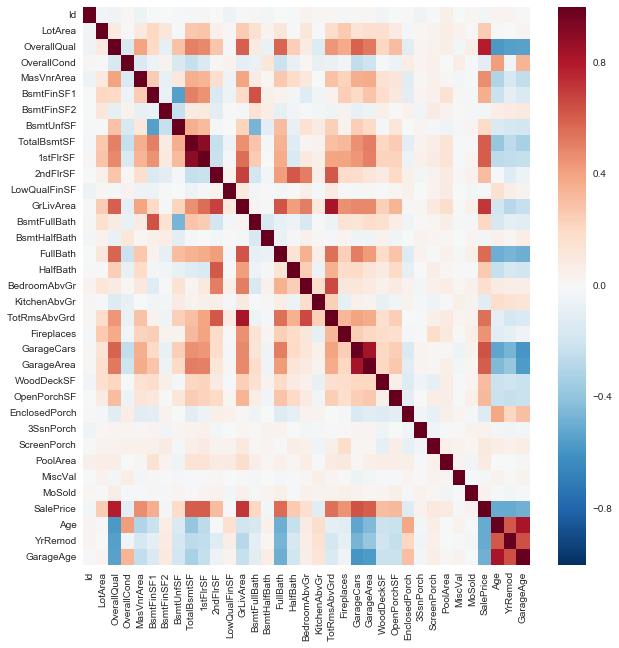

In [373]:
#Correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
corr = df_cln3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [149]:
#Delete the features, which are highly correlated
col_drop2 = ["1stFlrSF","GarageCars","GarageAge"]
dta = df_cln3.drop(df_cln3[col_drop2],axis=1)

## Exploration Data Analysis 

In [13]:
#Continuous features
dta.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,YrRemod,GarageAge
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,56.136024,10706.294469,6.219731,5.596413,110.360239,464.234679,49.218236,582.494768,1095.947683,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,186761.782511,34.776532,22.136771,29.209268
std,421.779691,41.252576,10336.621126,1.324472,1.078124,185.604816,458.792420,166.196584,439.950528,405.554435,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,78913.847668,29.603970,20.294171,24.813371
min,1.000000,20.000000,1300.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,35311.000000,0.000000,-1.000000,0.000000
25%,366.250000,20.000000,7744.000000,5.000000,5.000000,0.000000,0.000000,0.000000,248.000000,819.750000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,135000.000000,7.000000,4.000000,6.000000
50%,730.500000,50.000000,9600.000000,6.000000,5.000000,0.000000,413.000000,0.000000,489.000000,1021.500000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,168500.000000,33.000000,14.000000,28.000000
75%,1098.750000,70.000000,11760.750000,7.000000,6.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,220000.000000,52.000000,39.750000,46.750000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,755000.000000,129.000000,60.000000,107.000000


In [150]:
#Delete one row in "YrRemod" with the negative value.
dta = dta.drop((dta.loc[dta["YrRemod"] < 0]).index)

In [9]:
#Categorical features
dta.describe(include=["O"])

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,6,8,14,16,4,4,4,5,4,4,4,6,6,4,5,2,5,4,7,6,3,5,5,3,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,502,1065,1332,829,1206,1336,956,1264,209,1162,1324,1137,657,1037,1313,486,475,763,803,1182,619,594,1236,887,401,1175,1317,703,1276,1241,650,1253,852,580,1269,1286,1256,1158,1104


In [151]:
#Some of categorical features are highly skewed("RoofMatl","Condition2"...)
obj_df = dta.select_dtypes(include=['object']).copy()
int_df = dta.select_dtypes(exclude=['object']).copy()

obj_dict = {}
for i in obj_df.columns:
    obj_dict = obj_df[i].value_counts()
    print(i)
    print(obj_dict)

MSSubClass
20     502
60     293
50     129
120     86
160     61
80      57
70      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1065
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
Street
Pave    1332
Grvl       5
Name: Street, dtype: int64
LotShape
Reg    829
IR1    458
IR2     40
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1206
Bnk      51
HLS      48
Low      32
Name: LandContour, dtype: int64
Utilities
AllPub    1336
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     956
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1264
Mod      61
Sev      12
Name: LandSlope, dtype: int64
Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Sawyer      69
Edwards     69
SawyerW     53
Crawfor     50
Br

In [154]:
labels = k_means.labels_

In [147]:
colormap = np.array(['red', 'lime', 'black'])

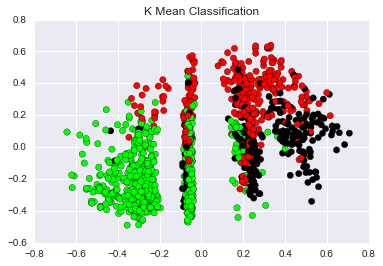

In [148]:
plt.scatter(X.OverallQual, X.GrLivArea, c=colormap[labels], s=40)
plt.title('K Mean Classification')


In [182]:
dta[(dta["GrLivArea"] > 5000) & (dta["OverallQual"] == 10)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,YrRemod


In [158]:
#Delete the outlier
dta = dta.drop((dta.loc[dta["Id"] == 1299]).index)

## Feature Selection 

### Mutual Information


In [14]:
from sklearn.feature_selection import mutual_info_regression

In [159]:
#Create the dummies
dum_df = pd.get_dummies(obj_df)

In [160]:
dta_dum = pd.concat([dum_df,int_df], axis=1)

In [161]:
#Apply the mutual information regressor to X and Y
X_mi = dta_dum.drop(['SalePrice'], axis=1)
y_mi = dta_dum['SalePrice']

In [14]:
#Obtain the mutual information score and devided by the max value in the list
mi = mutual_info_regression(X_mi, y_mi)
mi /= np.max(mi)

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [214]:
mi_dir = dict(zip(X_mi.columns, mi))

In [383]:
#Sort the score from high to low.
for key, value in sorted(mi_dir.items(), key=lambda item: (item[1], item[0]), reverse=True):
    print ("%s: %s" % (key, value))

OverallQual: 1.0
GrLivArea: 0.872657837212
TotalBsmtSF: 0.635078619964
Age: 0.627440328384
GarageArea: 0.622818293669
FullBath: 0.483804508622
YrRemod: 0.462371625726
ExterQual_TA: 0.461522762158
KitchenQual_TA: 0.398131234182
ExterQual_Gd: 0.379307092229
TotRmsAbvGrd: 0.37867273751
2ndFlrSF: 0.375330911934
BsmtQual_TA: 0.351030745158
GarageFinish_Unf: 0.314031820682
KitchenQual_Gd: 0.297291345023
Foundation_PConc: 0.295156022277
LotArea: 0.283048953976
Fireplaces: 0.274407052583
OpenPorchSF: 0.267291523929
BsmtQual_Gd: 0.248482178001
BsmtFinSF1: 0.247068690712
GarageType_Detchd: 0.229659696417
BsmtQual_Ex: 0.218522411537
BsmtUnfSF: 0.207498385275
GarageFinish_Fin: 0.206464324402
HeatingQC_Ex: 0.203072404941
MSSubClass_60: 0.200607323657
OverallCond: 0.194511960616
BsmtFinType1_GLQ: 0.191817720026
WoodDeckSF: 0.186800914758
Foundation_CBlock: 0.183940756679
KitchenQual_Ex: 0.169568291568
Exterior2nd_VinylSd: 0.168137432945
MSZoning_RM: 0.166806359225
MasVnrArea: 0.160835863032
HeatingQ

Here is the criteria for feature selection: 
1, The features show a larger gap than the next one in the rank. For example, there is a gap between "GarageArea" (Mutual score = 0.622818293669) and "FullBath" (Mutual score = 0.483804508622);
2, To obtain a reasonable size of features. The sufficient number of feature to build a good model, and also able to avoid over-fit.
In this case, we select 14 features: OverallQual, GrLivArea, TotalBsmtSF, GarageArea, Age, FullBath, YrRemod, ExterQual_TA, TotRmsAbvGrd, ExterQual_Gd, 2ndFlrSF, KitchenQual_TA BsmtQual_TA, GarageFinish_Unf

In [162]:
selected = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod", 
            "ExterQual_TA", "TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "BsmtQual_TA", 
            "GarageFinish_Unf"]
X = X_mi.loc[:,selected]

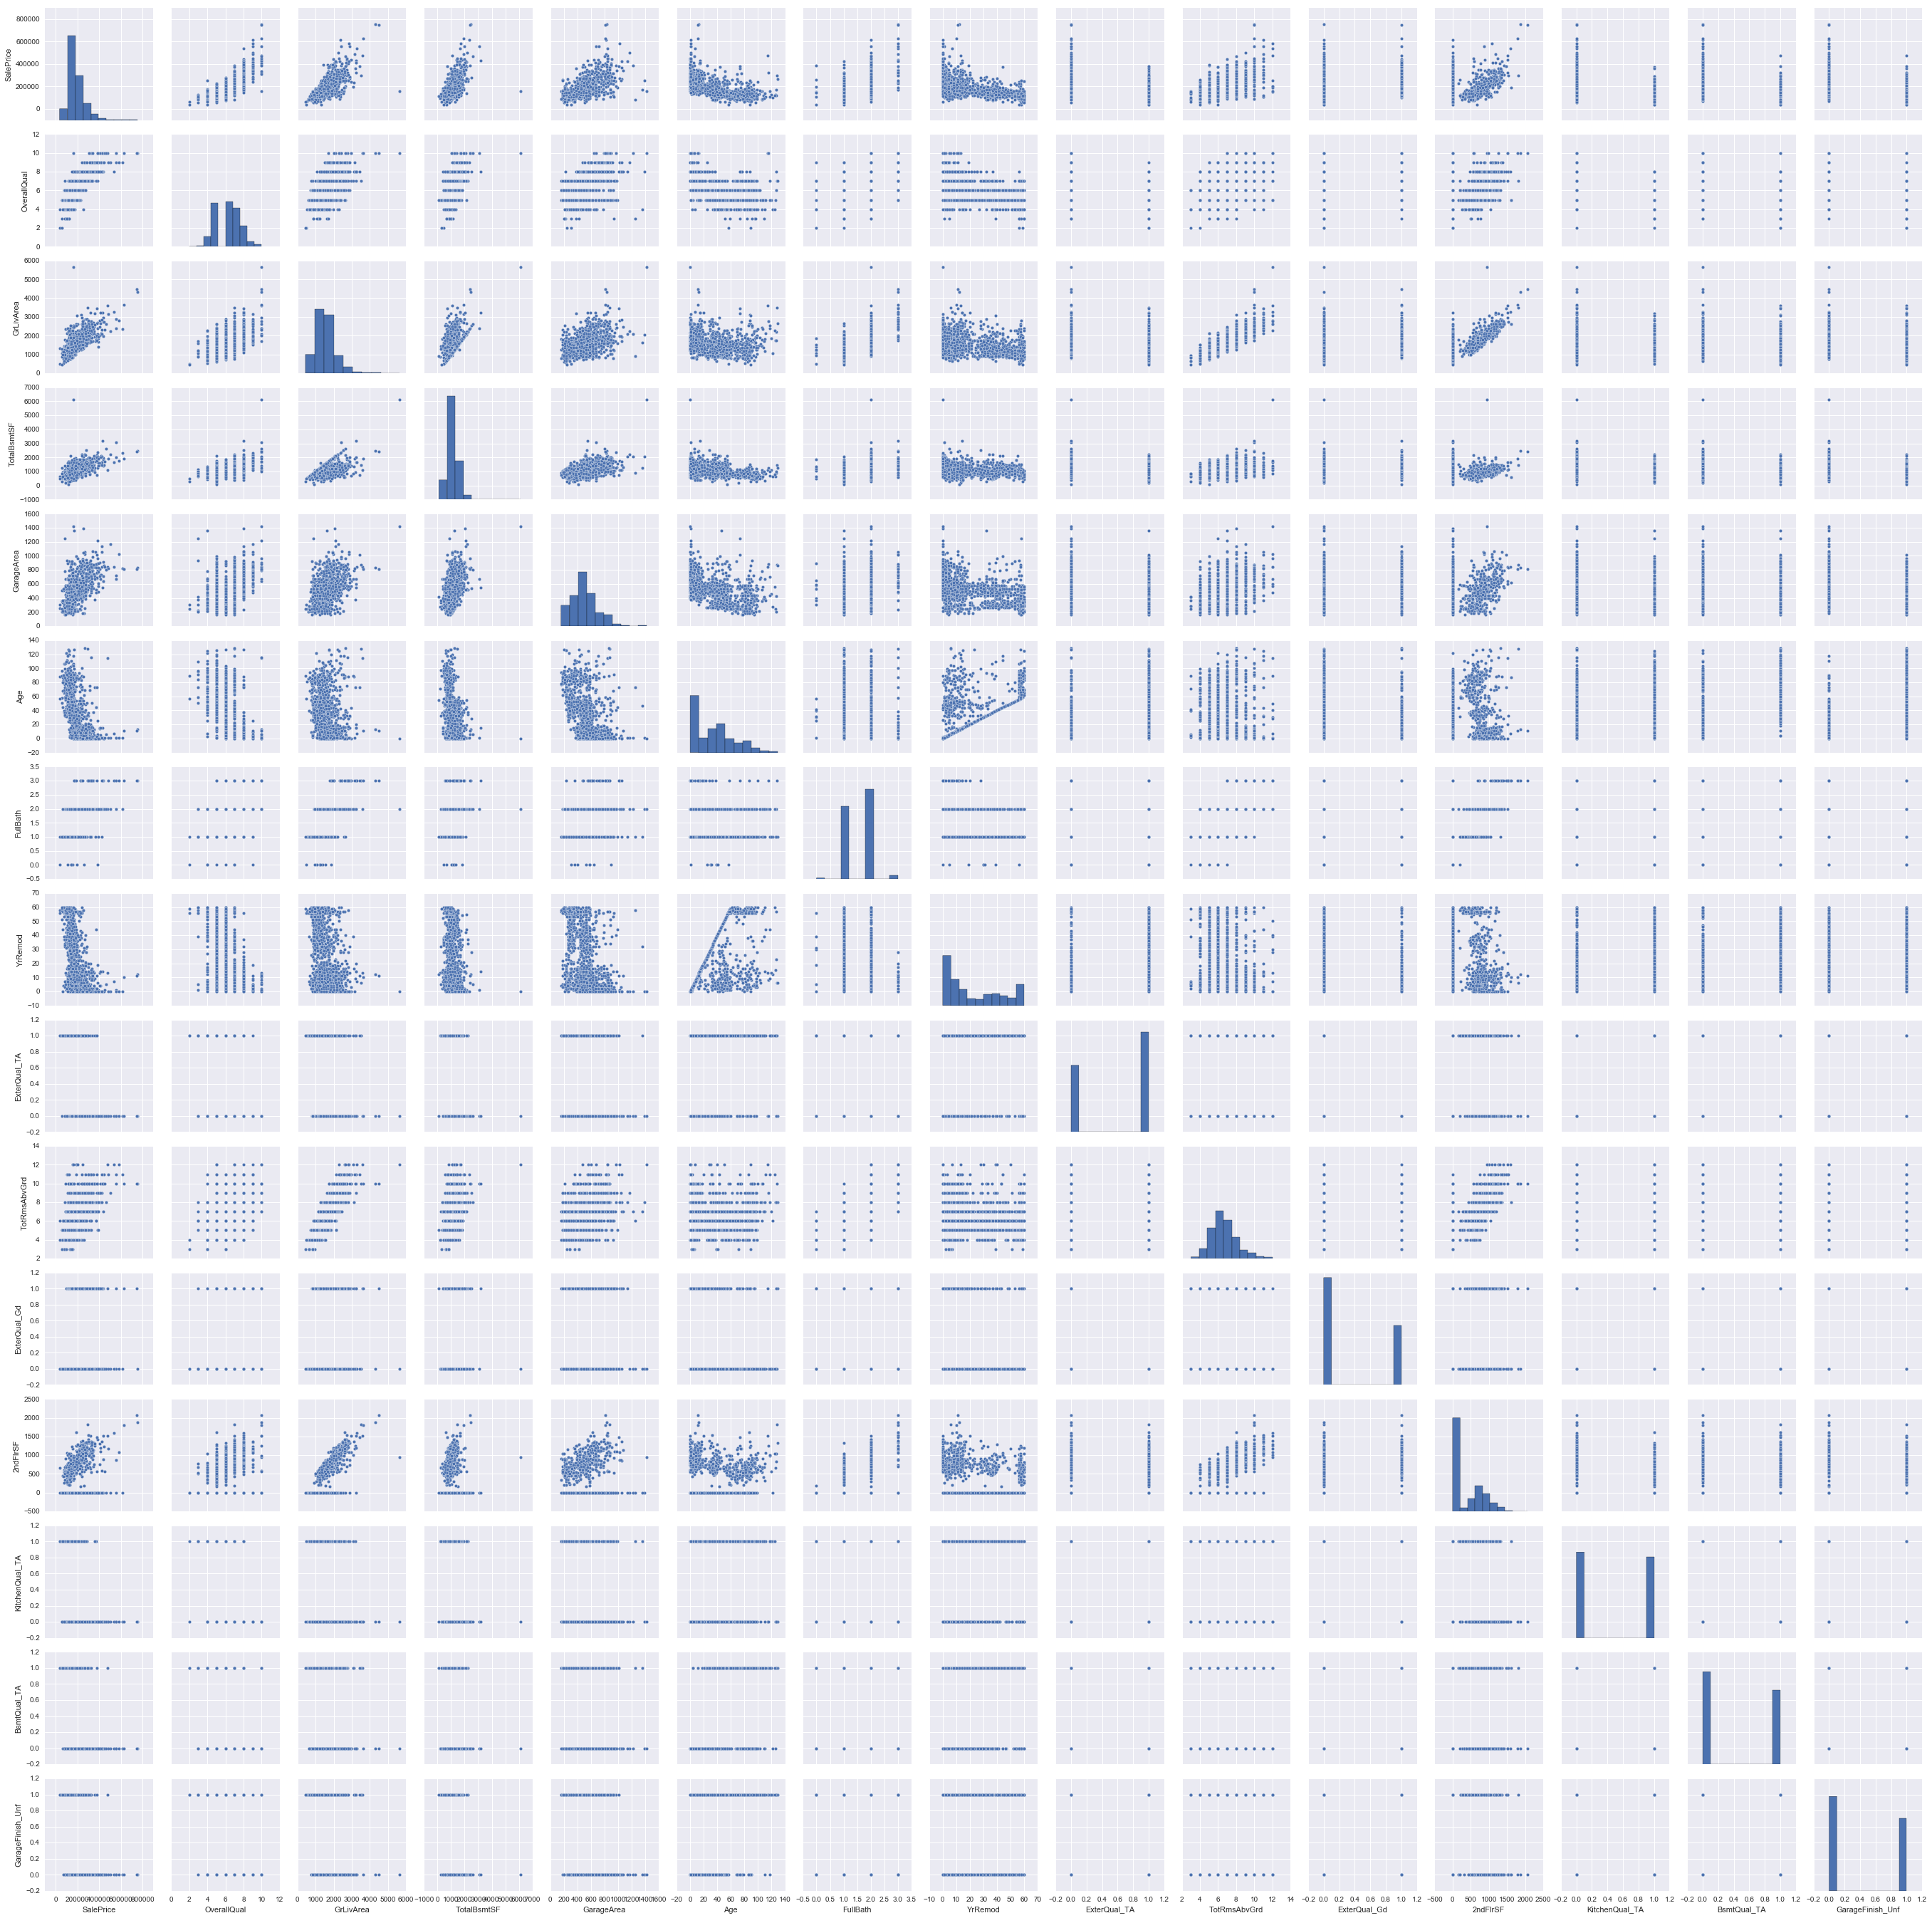

In [110]:
#Checking normality 
cols = ["SalePrice", "OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod",
        "ExterQual_TA","TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "BsmtQual_TA", 
        "GarageFinish_Unf"] 
sns.pairplot(dta_dum.loc[:,cols], size = 2.5)
plt.show()

In [163]:
#Transformed response
#applying log transformation
y = np.log(y_mi)

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


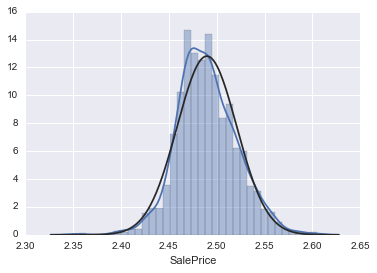

In [142]:
#Checking transformed histogram
sns.distplot(y, fit=norm);
fig = plt.figure()

In [164]:
from sklearn import preprocessing

In [165]:
## Standardizing numeric features
cols_scaled = ["OverallQual","GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "YrRemod", 
               "TotRmsAbvGrd", "2ndFlrSF", "FullBath"]
X_scaled = X.loc[:,cols_scaled]
X_standardized = (X_scaled - X_scaled.mean())/X_scaled.std()

In [166]:
X.update(X_standardized)

In [167]:
#Normalizing the features
X = pd.DataFrame(preprocessing.normalize(X, norm='l2'),columns = selected)

### LASSO & Elastic Net Regularization


In [168]:
from sklearn import linear_model, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [169]:
def LASTest(X_trn, X_ts, y_trn, y_ts):
    #Fit the LASSO regression
    model_fit = linear_model.LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
                           max_iter=5000,
                           cv = 5).fit(X_trn, y_trn)
    #List all the coefficients
    print(list(zip(X_trn.columns, model_fit.coef_)))
    #The R^2
    train_pred_lasso = model_fit.predict(X_trn)
    test_pred_lasso = model_fit.predict(X_ts)
    r2_score_lasso = r2_score(y_ts, test_pred_lasso)
    print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_trn - train_pred_lasso) ** 2))
    print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_ts - test_pred_lasso) ** 2))    
    print("r^2 on data : %f" % r2_score_lasso)

def ENSTest(X_trn, X_ts, y_trn, y_ts):
    model_fit = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                                    l1_ratio=[.01, .1, .5, .9, .99], 
                                    max_iter=5000,
                                   cv = 5).fit(X_trn, y_trn)
    #List all the coefficients
    print(list(zip(X_trn.columns, model_fit.coef_)))
    #The R^2
    train_pred_ENS = model_fit.predict(X_trn)
    test_pred_ENS = model_fit.predict(X_ts)
    r2_score_ENS = r2_score(y_ts, test_pred_ENS)
    print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_trn - train_pred_ENS) ** 2))
    print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_ts - test_pred_ENS) ** 2))    
    print("r^2 on data : %f" % r2_score_ENS)


In [170]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [171]:
LASTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35568903030459254), ('GrLivArea', 0.5520757139369914), ('TotalBsmtSF', 0.31820392375313761), ('GarageArea', 0.16193341434780381), ('Age', -0.21171160113556312), ('FullBath', -0.11155015626935808), ('YrRemod', -0.1852825317461563), ('ExterQual_TA', -0.1304413681120464), ('TotRmsAbvGrd', 0.019370358924623514), ('ExterQual_Gd', -0.40446275892963751), ('2ndFlrSF', 0.047963208776826152), ('KitchenQual_TA', -0.066312632498743002), ('BsmtQual_TA', 0.0085704171943808138), ('GarageFinish_Unf', -0.20193397248880826)]
Fit a model X_train, and calculate MSE with Y_train: 0.031020347936680556
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.02851401570614021
r^2 on data : 0.787756


In [172]:
ENSTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35819143082503457), ('GrLivArea', 0.54457861940873642), ('TotalBsmtSF', 0.31726892991072447), ('GarageArea', 0.16694894189646686), ('Age', -0.19752945797153618), ('FullBath', -0.10716866370964795), ('YrRemod', -0.18324419341995479), ('ExterQual_TA', -0.085052983025907816), ('TotRmsAbvGrd', 0.024410251377010448), ('ExterQual_Gd', -0.34531701980067742), ('2ndFlrSF', 0.04625397677251563), ('KitchenQual_TA', -0.060546989795014577), ('BsmtQual_TA', 0.0), ('GarageFinish_Unf', -0.19334005130121007)]
Fit a model X_train, and calculate MSE with Y_train: 0.03107789349563314
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028355002540165396
r^2 on data : 0.788940


From the result of the regularization, we delete "BsmtQual_TA".

In [173]:
selected2 =["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod", 
            "ExterQual_TA", "TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "GarageFinish_Unf"]
X = X.loc[:,selected2]

### Linear Regression

In [174]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [175]:
regr = linear_model.LinearRegression()

In [176]:
# Train the model using the training sets
regr_model = regr.fit(x_train, y_train)

In [177]:
list(zip(regr_model.coef_, selected2))

[(0.35315309555985863, 'OverallQual'),
 (0.54881999154978522, 'GrLivArea'),
 (0.32178656743548267, 'TotalBsmtSF'),
 (0.15986014420624814, 'GarageArea'),
 (-0.215282907046947, 'Age'),
 (-0.11493011339767834, 'FullBath'),
 (-0.18587630823856754, 'YrRemod'),
 (-0.14978842302440787, 'ExterQual_TA'),
 (0.019978895307951272, 'TotRmsAbvGrd'),
 (-0.43059362337574852, 'ExterQual_Gd'),
 (0.051971384283237387, '2ndFlrSF'),
 (-0.069352603260781576, 'KitchenQual_TA'),
 (-0.20707998675575928, 'GarageFinish_Unf')]

In [178]:
# mean squared error for training and test data
train_pred = regr_model.predict(x_train)
test_pred = regr_model.predict(x_test)

r2_train_reg = r2_score(y_train, train_pred)
r2_test_reg = r2_score(y_test, test_pred)
print("r^2 on training : %f" % r2_train_reg)
print("r^2 on test : %f" % r2_test_reg)

print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - train_pred) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - test_pred) ** 2))

r^2 on training : 0.786350
r^2 on test : 0.786837
Fit a model X_train, and calculate MSE with Y_train: 0.031017271538527534
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028637510770394416


In [179]:
scores = cross_validation.cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=5)
print("The cv score is", scores)
print("The average of cv score is", scores.mean())

The cv score is [-0.02947165 -0.02693236 -0.03315312 -0.03506251 -0.03068694]
The average of cv score is -0.0310613154373


##### Model diagnose

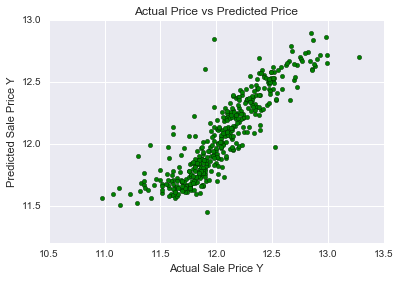

In [180]:
#plt.scatter(y_train, train_pred, c = "b", alpha = 0.5)
plt.scatter(y_test, test_pred, c = "g")
plt.xlabel("Actual Sale Price Y")
plt.ylabel("Predicted Sale Price Y")
plt.title("Actual Price vs Predicted Price")

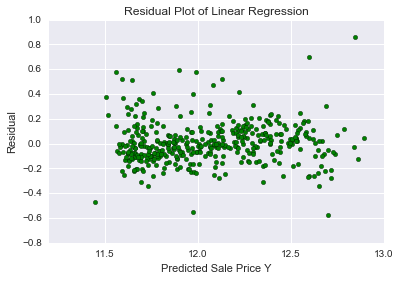

In [181]:
#plt.scatter(train_pred, train_pred - y_train, c = "b", alpha = 0.5)
plt.scatter(test_pred, test_pred - y_test, c = "g")
plt.title("Residual Plot of Linear Regression")
plt.ylabel("Residual")
plt.xlabel("Predicted Sale Price Y")

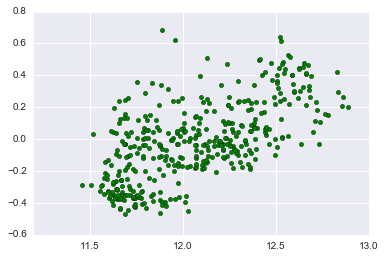

### Stochastic Gradient Descent

In [130]:
from sklearn.linear_model import SGDRegressor

In [131]:
X_sgd = X_mi.loc[:,selected2]

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_sgd)
X_sgd = pd.DataFrame(preprocessing.normalize(scaler.transform(X_sgd), norm='l2'),columns = selected2)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X_sgd, y, test_size=0.3, random_state=123)

In [134]:
sgd_reg = SGDRegressor()

In [135]:
sgd_reg_model = sgd_reg.fit(x_train, y_train)

In [136]:
list(zip(sgd_reg_model.coef_, selected2))

[(0.23556141418977461, 'OverallQual'),
 (0.096954368480619099, 'GrLivArea'),
 (0.041181064922535975, 'TotalBsmtSF'),
 (0.25935826479485324, 'GarageArea'),
 (-0.26233829015133536, 'Age'),
 (0.15695102313178222, 'FullBath'),
 (-0.054723697945784001, 'YrRemod'),
 (-0.0066826988593103095, 'ExterQual_TA'),
 (0.016588845228890092, 'TotRmsAbvGrd'),
 (0.018748479135659836, 'ExterQual_Gd'),
 (0.053412016383090295, '2ndFlrSF'),
 (-0.1028175558116415, 'KitchenQual_TA'),
 (-0.14106263568151797, 'GarageFinish_Unf')]

In [137]:
# mean squared error for training and test data
train_sgd_pred = sgd_reg_model.predict(x_train)
test_sgd_pred = sgd_reg_model.predict(x_test)

r2_train_reg = r2_score(y_train, train_sgd_pred)
r2_test_reg = r2_score(y_test, test_sgd_pred)
print("r^2 on training : %f" % r2_train_reg)
print("r^2 on test : %f" % r2_test_reg)

print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - train_sgd_pred) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - test_sgd_pred) ** 2))

r^2 on training : 0.637211
r^2 on test : 0.663549
Fit a model X_train, and calculate MSE with Y_train: 0.052145374564601596
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.046497452486049605


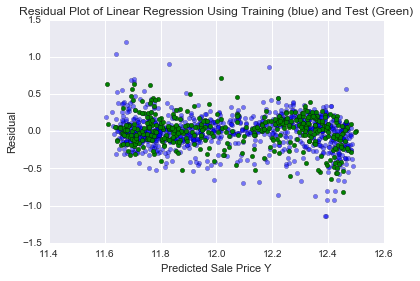

In [138]:
plt.scatter(train_sgd_pred, train_sgd_pred - y_train, c = "b", alpha = 0.5)
plt.scatter(test_sgd_pred, test_sgd_pred - y_test, c = "g")
plt.title("Residual Plot of Linear Regression Using Training (blue) and Test (Green)")
plt.ylabel("Residual")
plt.xlabel("Predicted Sale Price Y")

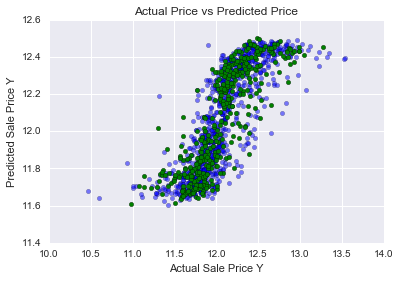

In [139]:
plt.scatter(y_train, train_sgd_pred, c = "b", alpha = 0.5)
plt.scatter(y_test, test_sgd_pred, c = "g")
plt.xlabel("Actual Sale Price Y")
plt.ylabel("Predicted Sale Price Y")
plt.title("Actual Price vs Predicted Price")

In [152]:
from sklearn.cluster import KMeans

In [153]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)